<a href="https://colab.research.google.com/github/Jahnvi99/Leuphana-Intern/blob/master/logpdf_Expected_improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gpytorch

In [2]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.integrate import simps
from numpy import trapz
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
def gaussian(x):
  return (torch.tensor(norm.logpdf(x))).float()       

X = torch.linspace(-3, 3, 1200)
#mean = 0.0
#std = 1.0
y = gaussian(X)

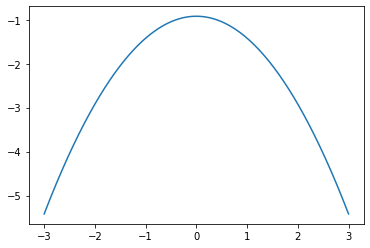

In [4]:
plt.plot(X,y)
plt.show()

In [5]:
trapz(y, dx=0.005)

-14.501549

In [6]:
# Using the simplest form of GP model, exact inference
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [7]:
likelihood = gpytorch.likelihoods.GaussianLikelihood()

In [8]:
X_sample = torch.tensor([ 1.3567,  2.2485, -2.6980])
y_sample = gaussian(X_sample)

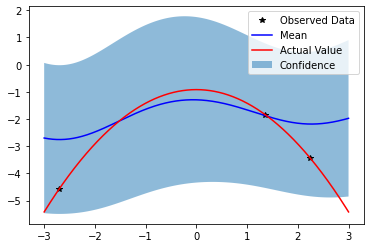

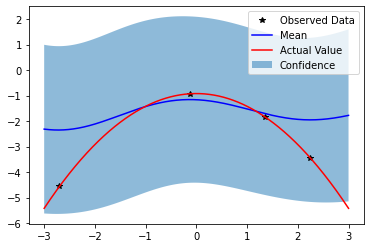

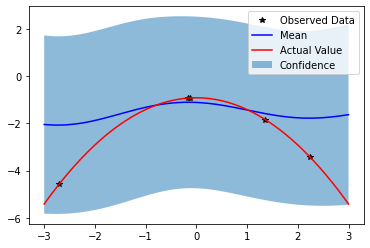

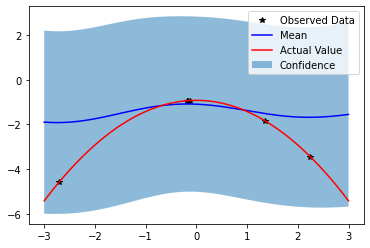

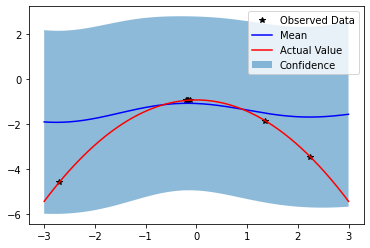

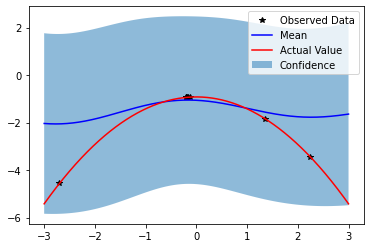

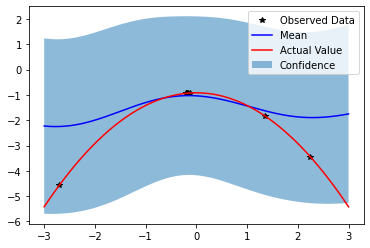

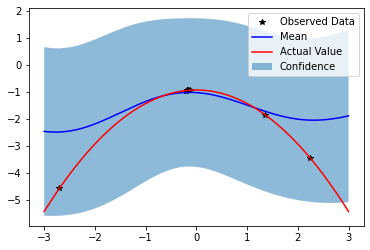

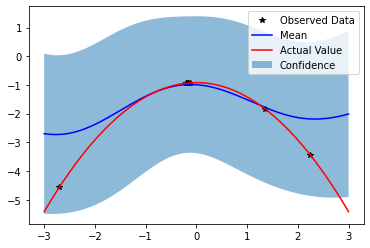

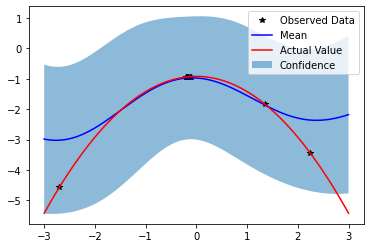

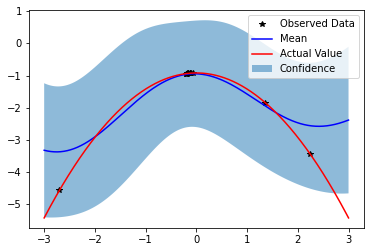

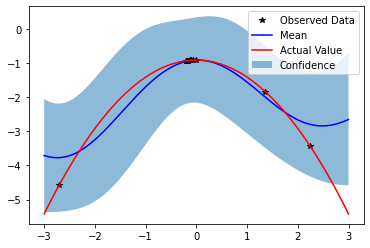

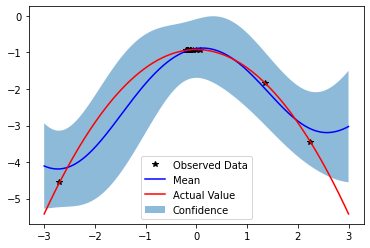

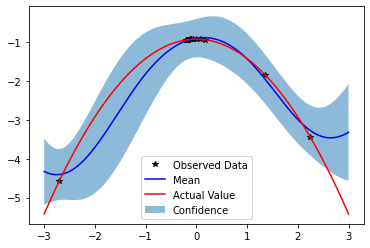

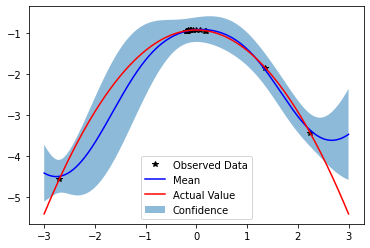

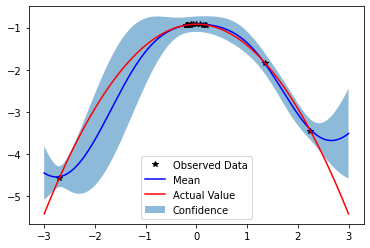

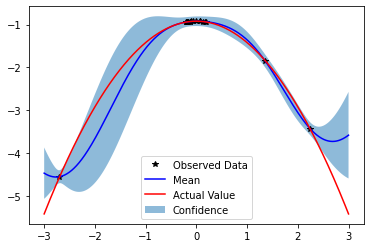

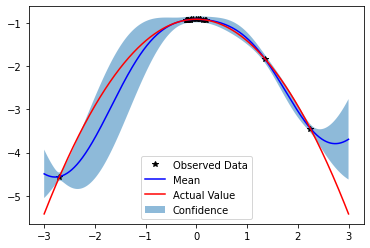

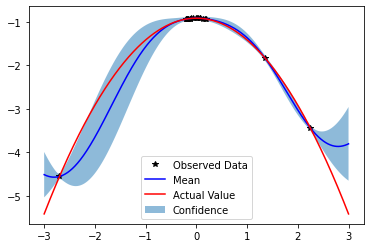

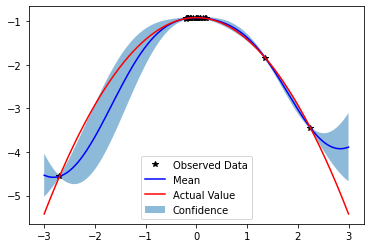

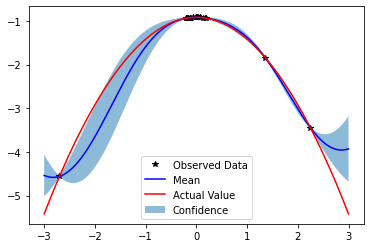

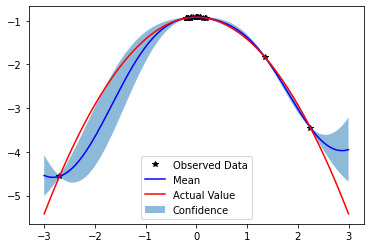

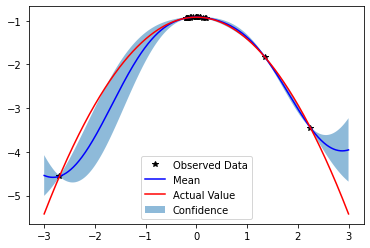

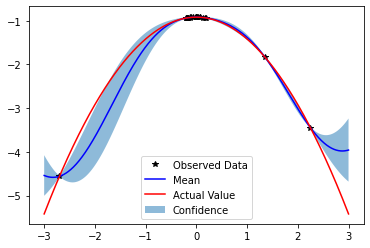

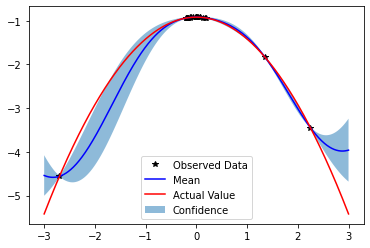

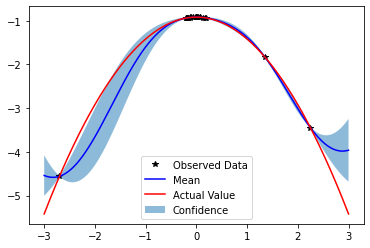

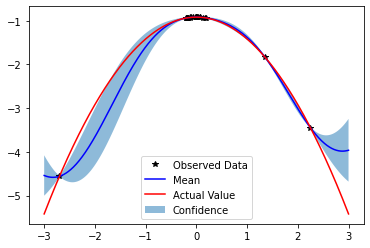

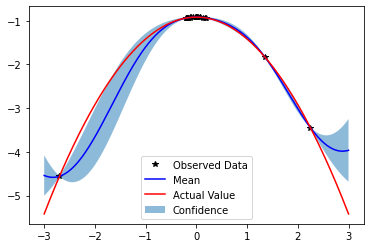

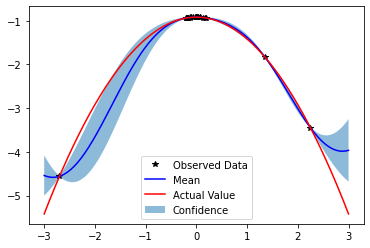

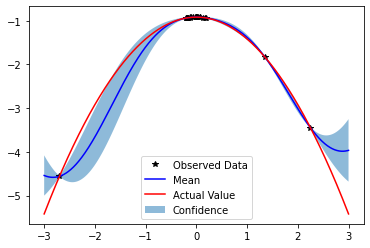

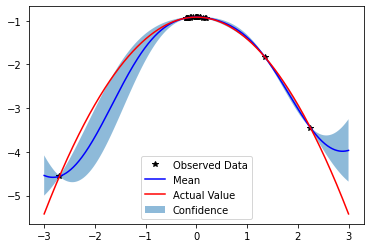

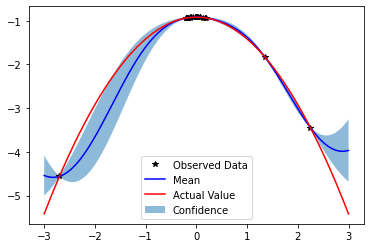

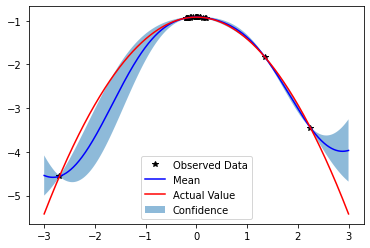

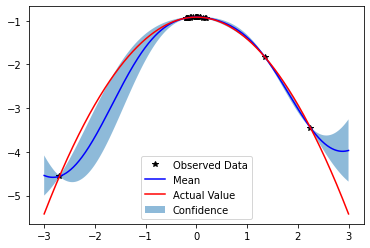

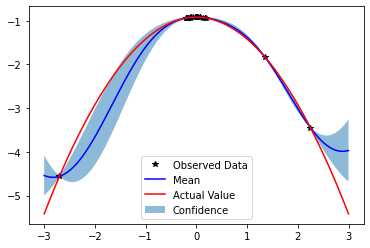

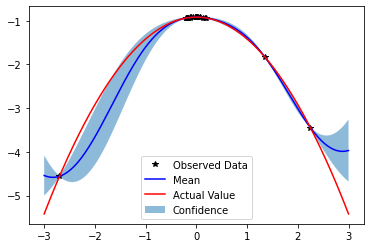

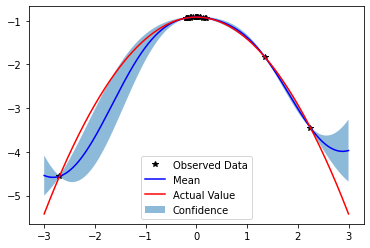

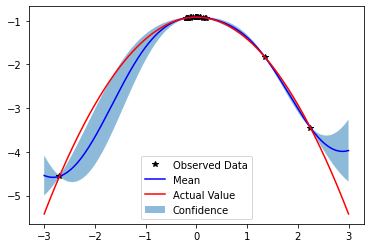

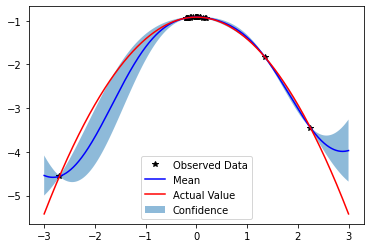

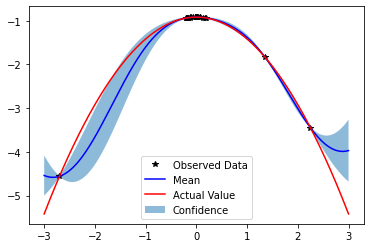

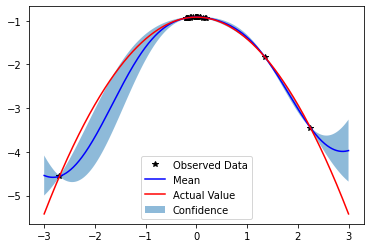

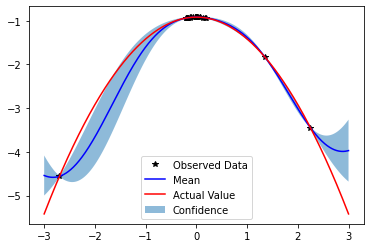

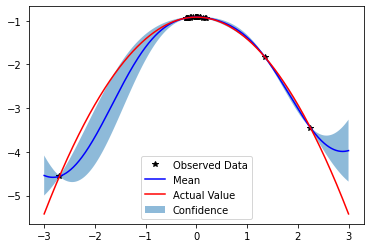

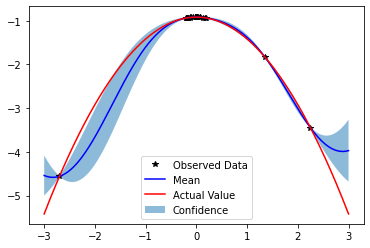

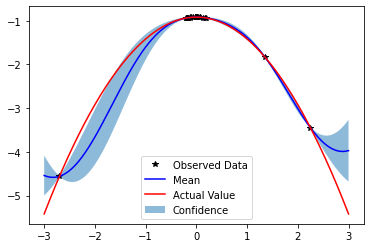

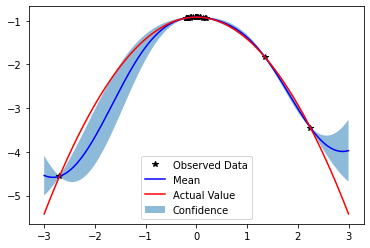

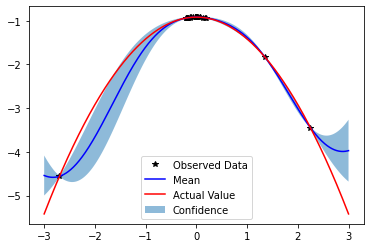

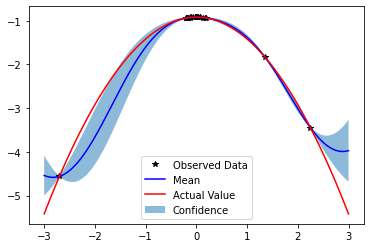

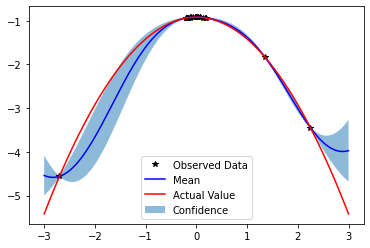

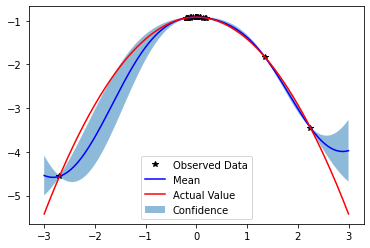

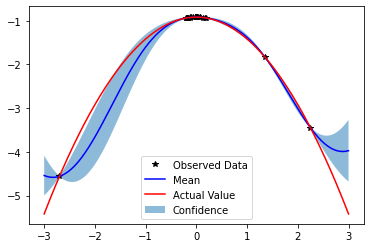

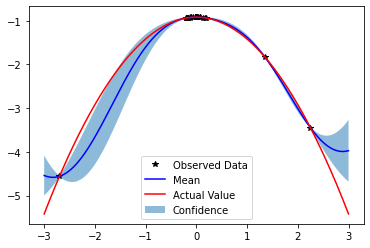

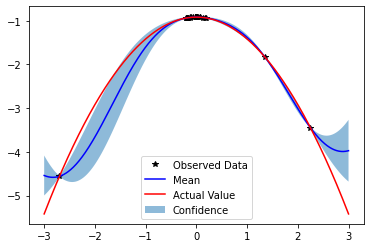

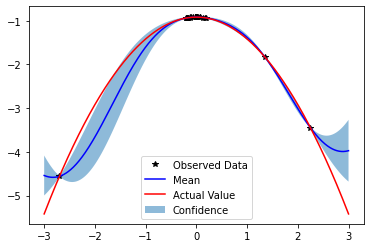

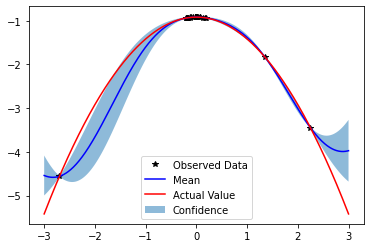

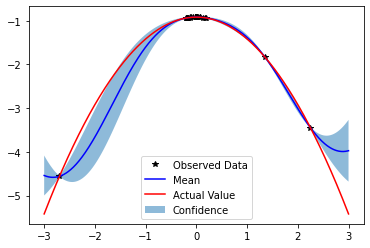

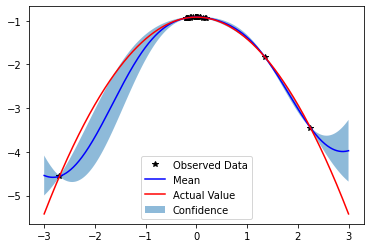

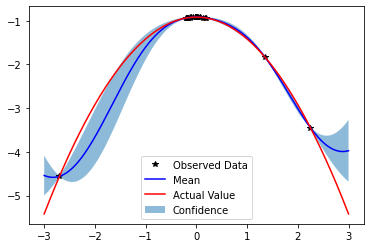

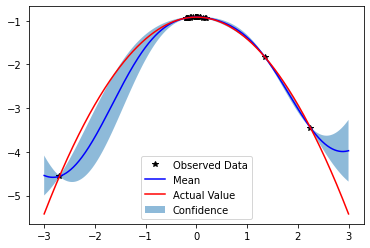

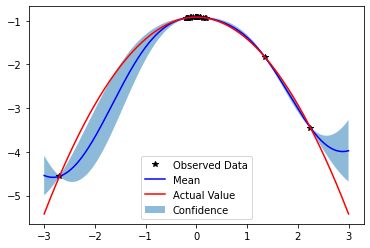

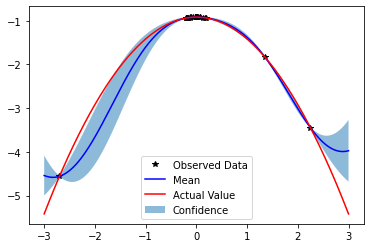

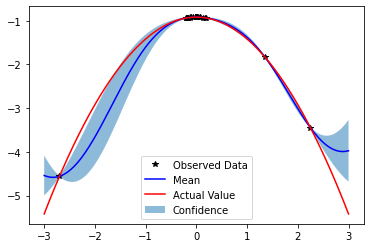

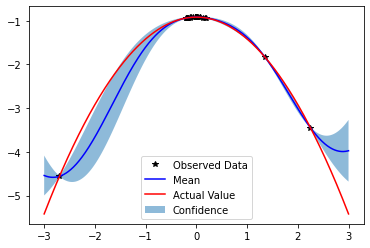

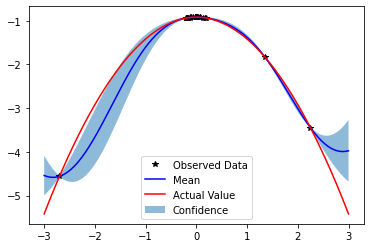

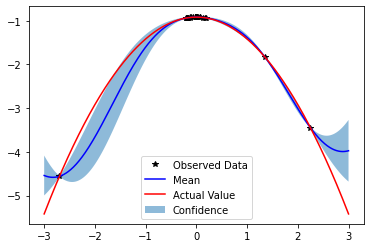

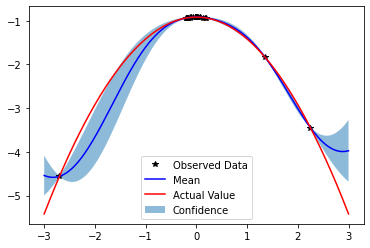

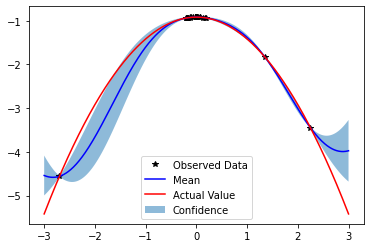

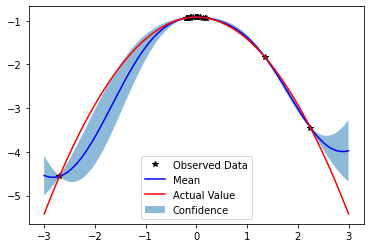

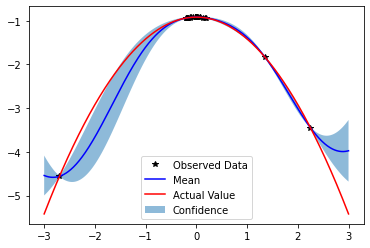

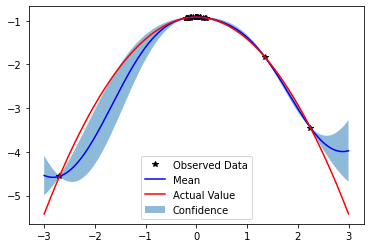

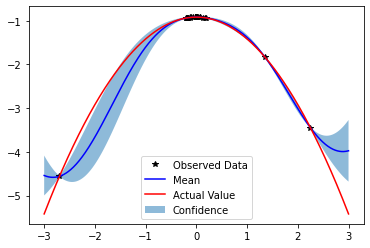

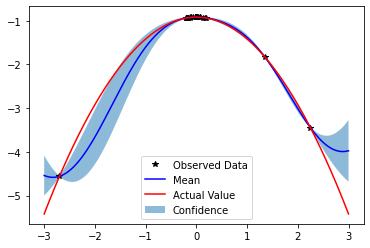

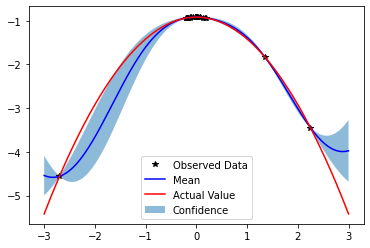

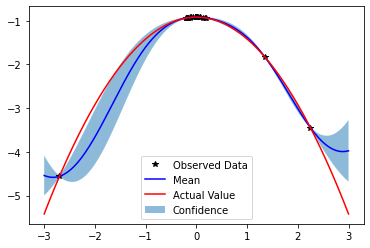

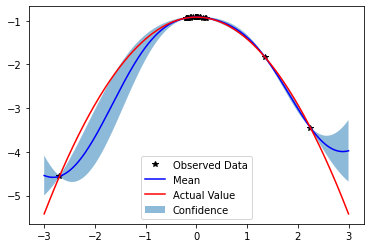

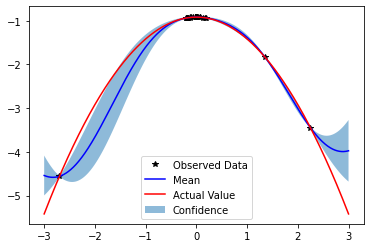

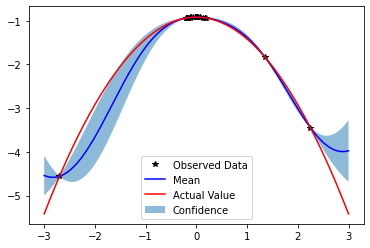

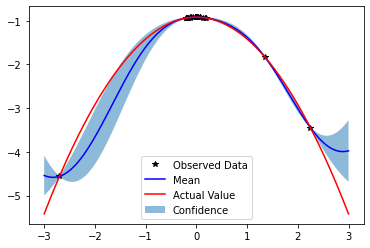

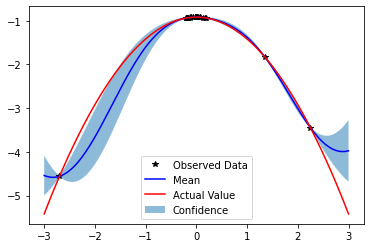

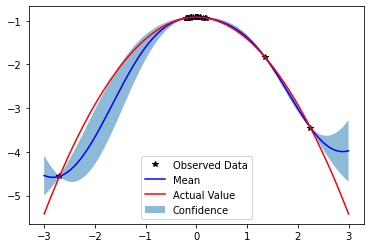

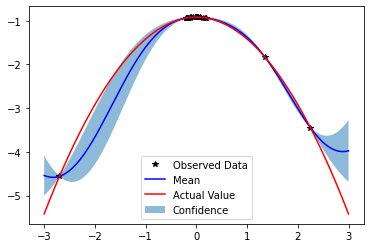

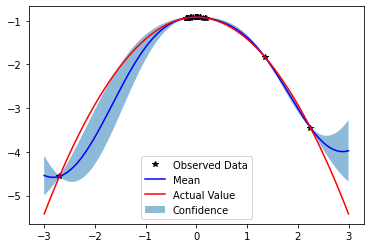

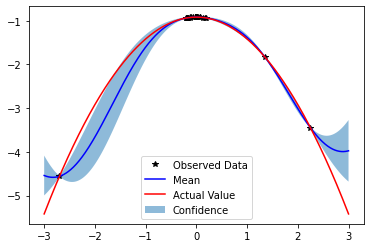

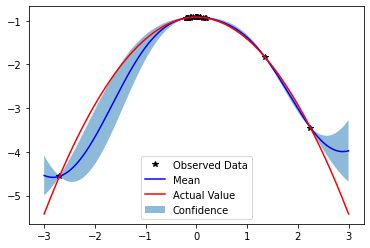

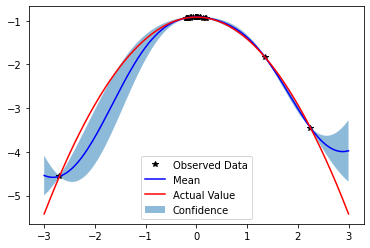

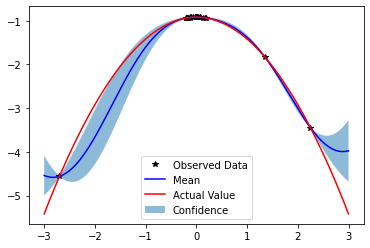

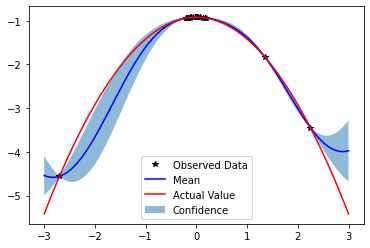

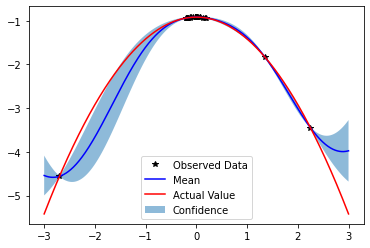

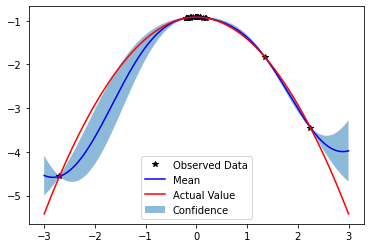

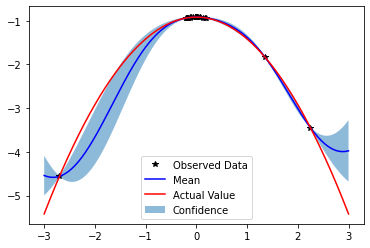

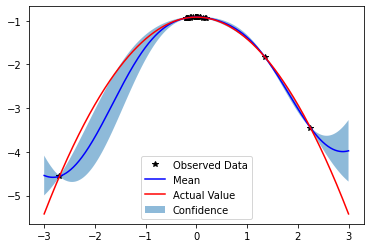

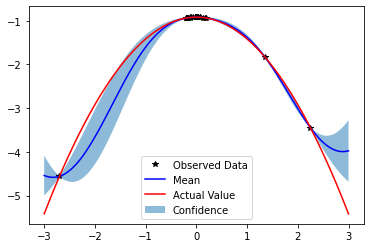

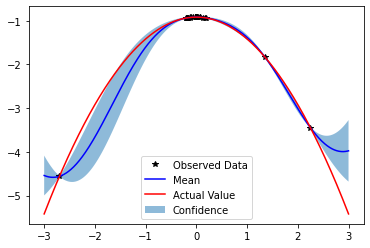

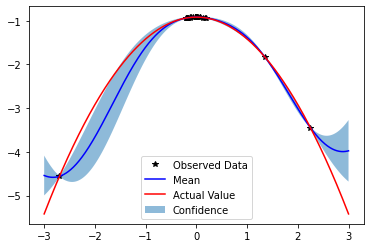

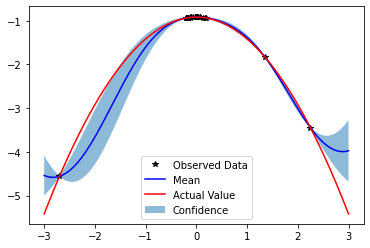

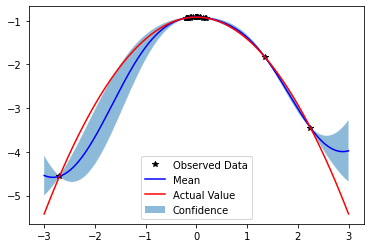

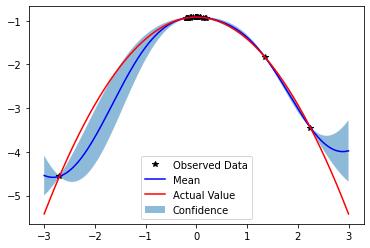

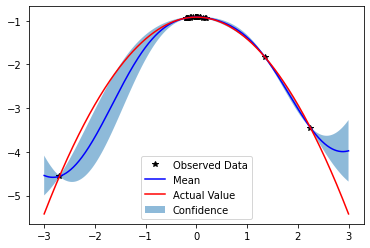

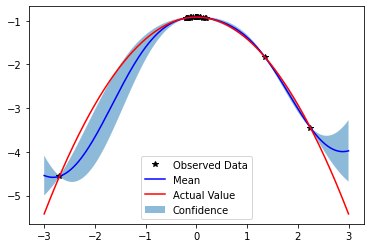

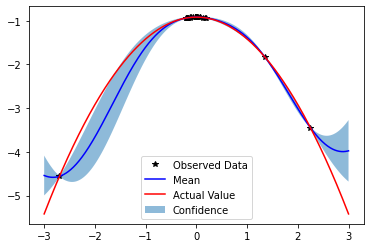

In [9]:
area1 = [] 
area2 = []

for i in range(100):
  model = ExactGPModel(X_sample, y_sample, likelihood)
  model.train()
  likelihood.train()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters
  mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
  for i in range(10):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(X_sample)
    # Calc loss and backprop gradients
    loss = -mll(output, y_sample)
    loss.backward()
    optimizer.step()

  model.eval()
  with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_x = X
    observed_pred = likelihood(model(test_x))
  with torch.no_grad():
    # Initialize plot
    #f, ax = plt.subplots()
    # Get standard deviation
    std = np.sqrt(observed_pred.variance.numpy())
    # Get upper and lower confidence bounds
    lower, upper = observed_pred.confidence_region()
    mean = observed_pred.mean.numpy()
    #lower, upper = mean - std, mean + std
    # Plot training data as black stars
    plt.plot(X_sample.numpy(), y_sample.numpy(), 'k*')
    # Plot predictive means as blue line
    plt.plot(test_x.numpy(), mean, 'b')
    # Plot actual function as red line
    plt.plot(test_x.numpy(), y.numpy(), 'r')
    # Shade between the lower and upper confidence bounds
    plt.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    ##ax.set_ylim([-3, 3])
    plt.legend(['Observed Data', 'Mean', 'Actual Value','Confidence'])
    plt.show()
  mu = observed_pred.mean
  sigma = torch.sqrt(observed_pred.variance)
  best_mu = torch.max(mu)
  check = (mu - best_mu - 1E-9)*torch.from_numpy(norm.cdf((mu - best_mu - 1E-9) / (sigma))) + sigma*torch.from_numpy(norm.cdf((mu - best_mu - 1E-9) / (sigma))) 
  temp = np.zeros(check.shape)
  check_copy = check.numpy()
  blah = np.maximum(temp, check_copy)
  idx = torch.argmax(torch.from_numpy(blah))
  p = torch.unsqueeze(X[idx], 0)  
  X_sample = torch.cat((X_sample, p))
  y_sample = gaussian(X_sample)  
  y_int = np.exp(observed_pred.mean.numpy())
  area1.append(trapz(y_int, dx=0.005))
  area2.append(simps(y_int, dx=0.005))    

In [10]:
plot_1 = []
plot_2 = []
for i in range(0,len(area1),5):
  plot_1.append(area1[i])
  plot_2.append(area2[i])

size = list(X_sample.shape)
x = []
for i in range(3, size[0], 5):
  x.append(i)

In [11]:
area1

[0.95117426,
 1.1621827,
 1.3086439,
 1.4073137,
 1.4197037,
 1.3585274,
 1.2849474,
 1.2116586,
 1.1402624,
 1.0702064,
 1.0016294,
 0.94109607,
 0.9057788,
 0.90984195,
 0.93646514,
 0.95453763,
 0.9570246,
 0.95310473,
 0.9487925,
 0.94556475,
 0.94346637,
 0.94228244,
 0.9416685,
 0.94131815,
 0.9411211,
 0.9409642,
 0.94086826,
 0.94077516,
 0.94069475,
 0.94062483,
 0.9405464,
 0.94050413,
 0.94043946,
 0.94039726,
 0.9403552,
 0.9403064,
 0.9402604,
 0.94022715,
 0.9402006,
 0.940156,
 0.9401444,
 0.9401252,
 0.9401089,
 0.9400588,
 0.94004875,
 0.94001776,
 0.9400091,
 0.9399841,
 0.93999034,
 0.9399608,
 0.939941,
 0.93993473,
 0.93990105,
 0.93990254,
 0.93989646,
 0.9398756,
 0.9398576,
 0.9398425,
 0.9398444,
 0.9398154,
 0.9398204,
 0.9398055,
 0.9398024,
 0.93979275,
 0.9397863,
 0.93978006,
 0.93977535,
 0.9397626,
 0.9397552,
 0.9397495,
 0.9397309,
 0.93972486,
 0.93973786,
 0.93971705,
 0.9397141,
 0.9397119,
 0.9397007,
 0.93970037,
 0.9396969,
 0.93969274,
 0.939689

In [12]:
area2

[0.951174159757793,
 1.1621825056150556,
 1.308643770031631,
 1.4073136831074953,
 1.4197037484124302,
 1.358527347035706,
 1.2849472756125033,
 1.211658383309841,
 1.140262364819646,
 1.0702062081173063,
 1.0016292569879441,
 0.9410960401874036,
 0.905778829571791,
 0.9098419036809355,
 0.9364651663601399,
 0.9545375764206984,
 0.9570246302103623,
 0.9531046853610314,
 0.9487925253342837,
 0.9455646480899305,
 0.9434664368536323,
 0.9422824658593163,
 0.9416685219528154,
 0.9413181733665987,
 0.9411211963440291,
 0.9409642439964228,
 0.9408683447330258,
 0.9407752526341937,
 0.9406947449618019,
 0.9406247939052992,
 0.9405464378278703,
 0.9405040313815698,
 0.9404395707836375,
 0.940397404031828,
 0.9403551212185994,
 0.940306522231549,
 0.9402604307606817,
 0.9402271543606184,
 0.9402006143517793,
 0.940156073733233,
 0.9401444984041154,
 0.9401252934080548,
 0.9401088877255097,
 0.9400588076980785,
 0.9400487840734422,
 0.9400177768268623,
 0.940009245746769,
 0.9399841438233852,
 0

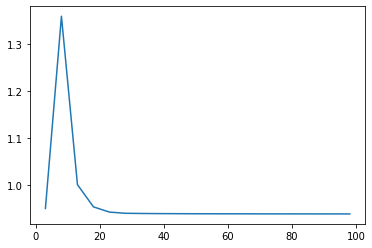

In [13]:
plt.plot(x,plot_1)
plt.show()

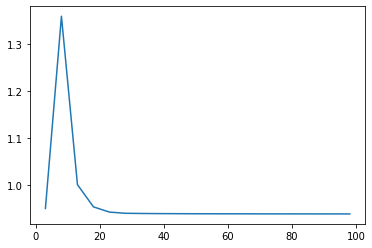

In [14]:
plt.plot(x,plot_2)
plt.show()

In [15]:
X_sample[0:3]

tensor([ 1.3567,  2.2485, -2.6980])

In [16]:
trapz(torch.exp(y), dx=0.005)

0.99646914